# 🔧 Feature Engineering - Criação de Novas Variáveis
## Desafio 2 - Ciência e Governança de Dados

---

### Objetivos:
- Criar features derivadas dos dados originais
- Gerar variáveis de crescimento e tendência
- Criar features de lag e rolling statistics
- Normalizar e transformar variáveis
- Preparar dados para modelagem

In [1]:
# Importações
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from src.data_processing import DataProcessor
from src.visualization import DataVisualizer

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 1️⃣ Carregamento dos Dados

In [2]:
# Inicializa processador e visualizador
processor = DataProcessor(base_path='../data')
visualizer = DataVisualizer()

# Carrega dados
df = processor.load_base_final()

print(f"📦 Shape original: {df.shape}")
print(f"📅 Período: {df['ano'].min()} - {df['ano'].max()}")

df.head()

📦 Shape original: (90, 7)
📅 Período: 2012 - 2021


,UF,ano,populacao,pib_mil_reais,pib_bilhoes,IDH,desmatamento_km2
0,AC,2012,758786,10137925.0000,10.1400,0.7010,270.5973
1,AC,2013,776463,11473929.0000,11.4700,0.7060,200.2401
2,AC,2014,790101,13458696.0000,13.4600,0.7150,348.6096
3,AC,2015,803513,13622803.0000,13.6200,0.7180,223.0037
4,AC,2016,816687,13754242.0000,13.7500,0.7230,366.3338


## 2️⃣ Features Temporais

In [3]:
# Cria features temporais básicas
df = processor.create_time_features(df, year_column='ano')

print("✅ Features temporais criadas:")
print("   - ano_categorico")
print("   - ano_normalizado")
print("   - decada")

df[['ano', 'ano_categorico', 'ano_normalizado', 'decada']].head()

✅ Features temporais criadas:
   - ano_categorico
   - ano_normalizado
   - decada


,ano,ano_categorico,ano_normalizado,decada
0,2012,2012,0.0000,2010
1,2013,2013,0.1111,2010
2,2014,2014,0.2222,2010
3,2015,2015,0.3333,2010
4,2016,2016,0.4444,2010


## 3️⃣ Features de Crescimento (Taxa de Variação)

In [4]:
# Taxa de crescimento do desmatamento
df = processor.calculate_growth_rate(df, 'desmatamento_km2', group_column='UF', year_column='ano')

# Taxa de crescimento do PIB
df = processor.calculate_growth_rate(df, 'pib_bilhoes', group_column='UF', year_column='ano')

# Taxa de crescimento da população
df = processor.calculate_growth_rate(df, 'populacao', group_column='UF', year_column='ano')

# Taxa de crescimento do IDH
df = processor.calculate_growth_rate(df, 'IDH', group_column='UF', year_column='ano')

print("✅ Features de crescimento criadas:")
print("   - desmatamento_km2_growth_rate")
print("   - pib_bilhoes_growth_rate")
print("   - populacao_growth_rate")
print("   - IDH_growth_rate")

df[['UF', 'ano', 'desmatamento_km2', 'desmatamento_km2_growth_rate']].head(12)

✅ Features de crescimento criadas:
   - desmatamento_km2_growth_rate
   - pib_bilhoes_growth_rate
   - populacao_growth_rate
   - IDH_growth_rate


,UF,ano,desmatamento_km2,desmatamento_km2_growth_rate
0,AC,2012,270.5973,NaN
1,AC,2013,200.2401,-26.0007
2,AC,2014,348.6096,74.0958
3,AC,2015,223.0037,-36.0305
4,AC,2016,366.3338,64.2725
5,AC,2017,245.8876,-32.8788
6,AC,2018,426.7193,73.5424
7,AC,2019,706.9391,65.6684
8,AC,2020,3259.6579,361.0946
9,AC,2021,266.4673,-91.8253


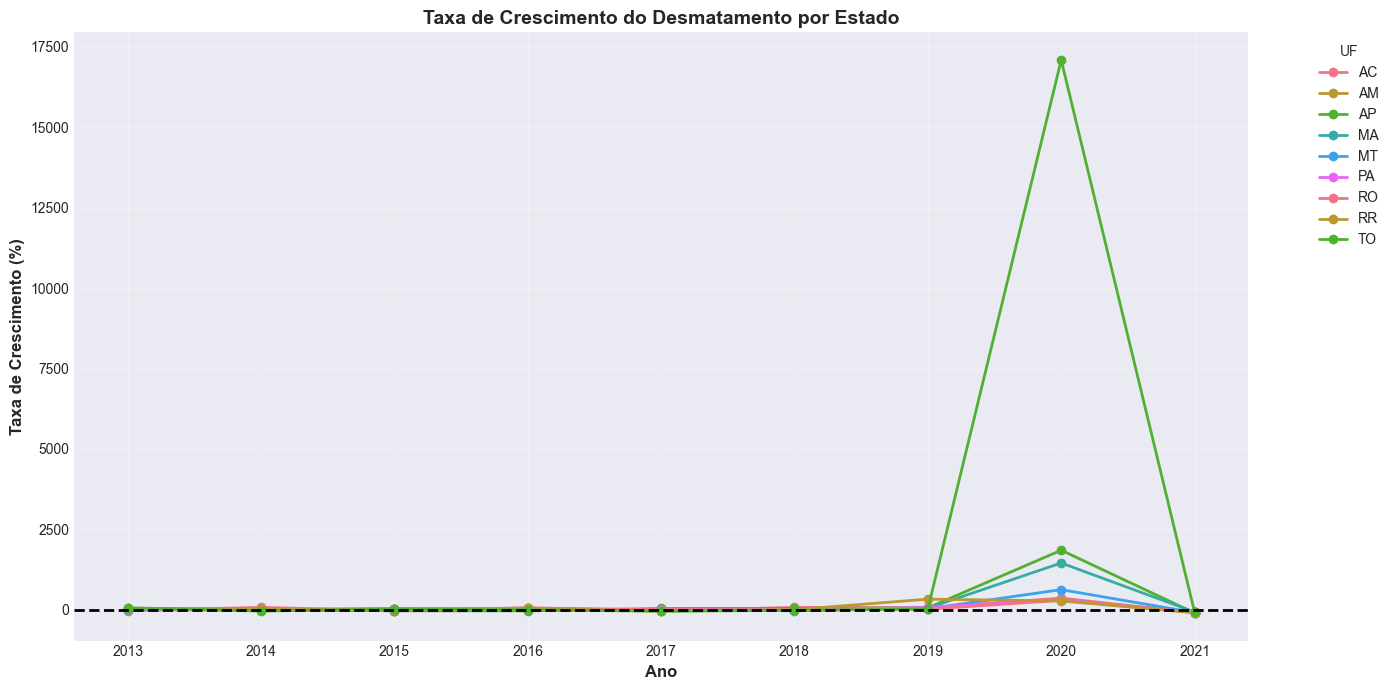

In [5]:
# Visualizar taxas de crescimento do desmatamento
fig, ax = plt.subplots(figsize=(14, 7))

for uf in df['UF'].unique():
    data = df[df['UF'] == uf]
    ax.plot(data['ano'], data['desmatamento_km2_growth_rate'], 
           marker='o', label=uf, linewidth=2, markersize=6)

ax.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Crescimento (%)', fontsize=12, fontweight='bold')
ax.set_title('Taxa de Crescimento do Desmatamento por Estado', fontsize=14, fontweight='bold')
ax.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4️⃣ Features de Lag (Valores Defasados)

In [6]:
# Ordena por UF e ano
df = df.sort_values(['UF', 'ano']).reset_index(drop=True)

# Cria lags de 1 e 2 anos para desmatamento
df['desmatamento_lag1'] = df.groupby('UF')['desmatamento_km2'].shift(1)
df['desmatamento_lag2'] = df.groupby('UF')['desmatamento_km2'].shift(2)

# Cria lags para PIB
df['pib_lag1'] = df.groupby('UF')['pib_bilhoes'].shift(1)

# Cria lags para IDH
df['idh_lag1'] = df.groupby('UF')['IDH'].shift(1)

print("✅ Features de lag criadas:")
print("   - desmatamento_lag1 (ano anterior)")
print("   - desmatamento_lag2 (2 anos antes)")
print("   - pib_lag1")
print("   - idh_lag1")

df[['UF', 'ano', 'desmatamento_km2', 'desmatamento_lag1', 'desmatamento_lag2']].head(15)

✅ Features de lag criadas:
   - desmatamento_lag1 (ano anterior)
   - desmatamento_lag2 (2 anos antes)
   - pib_lag1
   - idh_lag1


,UF,ano,desmatamento_km2,desmatamento_lag1,desmatamento_lag2
0,AC,2012,270.5973,NaN,NaN
1,AC,2013,200.2401,270.5973,NaN
2,AC,2014,348.6096,200.2401,270.5973
3,AC,2015,223.0037,348.6096,200.2401
4,AC,2016,366.3338,223.0037,348.6096
5,AC,2017,245.8876,366.3338,223.0037
6,AC,2018,426.7193,245.8876,366.3338
7,AC,2019,706.9391,426.7193,245.8876
8,AC,2020,3259.6579,706.9391,426.7193
9,AC,2021,266.4673,3259.6579,706.9391


## 5️⃣ Rolling Statistics (Médias Móveis)

✅ Rolling statistics criadas:
   - desmatamento_ma3 (média móvel 3 anos)
   - desmatamento_std3 (desvio padrão móvel 3 anos)
   - pib_ma3


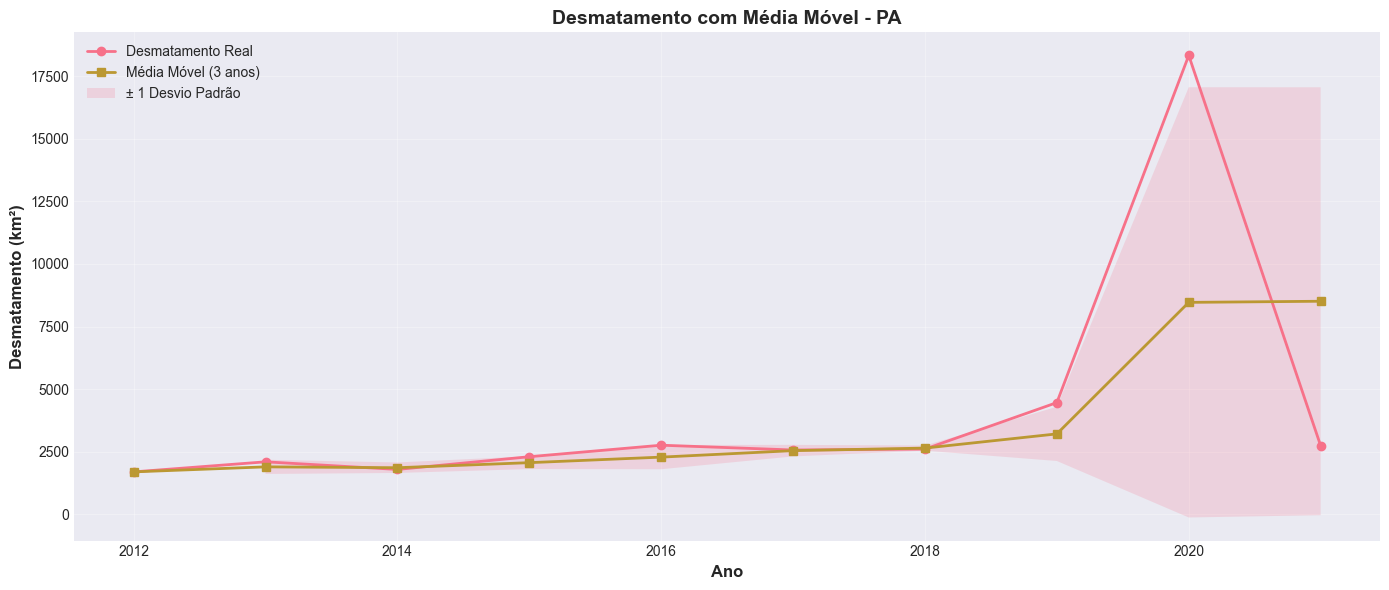

In [7]:
# Média móvel de 3 anos para desmatamento
df['desmatamento_ma3'] = df.groupby('UF')['desmatamento_km2'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Desvio padrão móvel de 3 anos
df['desmatamento_std3'] = df.groupby('UF')['desmatamento_km2'].transform(
    lambda x: x.rolling(window=3, min_periods=1).std()
)

# Média móvel para PIB
df['pib_ma3'] = df.groupby('UF')['pib_bilhoes'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

print("✅ Rolling statistics criadas:")
print("   - desmatamento_ma3 (média móvel 3 anos)")
print("   - desmatamento_std3 (desvio padrão móvel 3 anos)")
print("   - pib_ma3")

# Visualização
uf_exemplo = 'PA'
df_uf = df[df['UF'] == uf_exemplo]

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_uf['ano'], df_uf['desmatamento_km2'], marker='o', label='Desmatamento Real', linewidth=2)
ax.plot(df_uf['ano'], df_uf['desmatamento_ma3'], marker='s', label='Média Móvel (3 anos)', linewidth=2)
ax.fill_between(df_uf['ano'], 
                df_uf['desmatamento_ma3'] - df_uf['desmatamento_std3'],
                df_uf['desmatamento_ma3'] + df_uf['desmatamento_std3'],
                alpha=0.2, label='± 1 Desvio Padrão')

ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Desmatamento (km²)', fontsize=12, fontweight='bold')
ax.set_title(f'Desmatamento com Média Móvel - {uf_exemplo}', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6️⃣ Features Derivadas (Razões e Indicadores)

In [8]:
# PIB per capita
df['pib_per_capita'] = (df['pib_bilhoes'] * 1e9) / df['populacao']

# Desmatamento per capita
df['desmatamento_per_capita'] = (df['desmatamento_km2'] * 1e6) / df['populacao']  # m² por habitante

# Intensidade de desmatamento (desmatamento / PIB)
df['intensidade_desmatamento'] = df['desmatamento_km2'] / df['pib_bilhoes']

# Índice composto: IDH ajustado por desmatamento
df['idh_ajustado'] = df['IDH'] * (1 / (1 + df['desmatamento_km2'] / 1000))

print("✅ Features derivadas criadas:")
print("   - pib_per_capita (R$/habitante)")
print("   - desmatamento_per_capita (m²/habitante)")
print("   - intensidade_desmatamento (km²/bilhão R$)")
print("   - idh_ajustado")

df[['UF', 'ano', 'pib_per_capita', 'desmatamento_per_capita', 'intensidade_desmatamento']].head(10)

✅ Features derivadas criadas:
   - pib_per_capita (R$/habitante)
   - desmatamento_per_capita (m²/habitante)
   - intensidade_desmatamento (km²/bilhão R$)
   - idh_ajustado


,UF,ano,pib_per_capita,desmatamento_per_capita,intensidade_desmatamento
0,AC,2012,13363.4516,356.6187,26.6861
1,AC,2013,14772.1141,257.8875,17.4577
2,AC,2014,17035.7967,441.2215,25.8997
3,AC,2015,16950.5658,277.5359,16.3733
4,AC,2016,16836.3155,448.5608,26.6425
5,AC,2017,17200.6668,296.3862,17.2311
6,AC,2018,17635.5887,490.8966,27.8356
7,AC,2019,17722.3945,801.5773,45.2296
8,AC,2020,18424.3183,3644.2339,197.7948
9,AC,2021,23564.4123,293.8299,12.4692


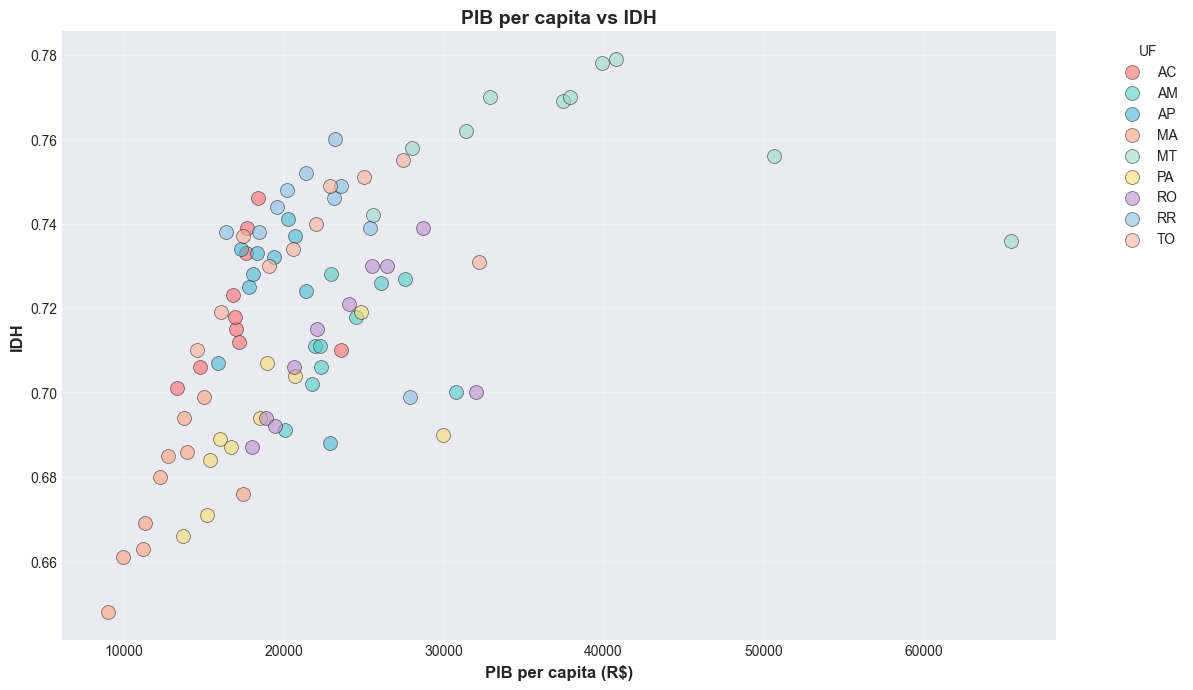

In [9]:
# Visualizar PIB per capita vs IDH
fig = visualizer.plot_scatter(
    df=df,
    x='pib_per_capita',
    y='IDH',
    hue='UF',
    title='PIB per capita vs IDH',
    figsize=(12, 7)
)
plt.xlabel('PIB per capita (R$)', fontweight='bold')
plt.show()

## 7️⃣ Features Categóricas e de Agrupamento

In [10]:
# Categoria de IDH
def categorizar_idh(idh):
    if idh < 0.550:
        return 'Muito Baixo'
    elif idh < 0.700:
        return 'Baixo'
    elif idh < 0.800:
        return 'Alto'
    else:
        return 'Muito Alto'

df['categoria_idh'] = df['IDH'].apply(categorizar_idh)

# Categoria de desmatamento
df['categoria_desmatamento'] = pd.qcut(
    df['desmatamento_km2'], 
    q=4, 
    labels=['Baixo', 'Médio', 'Alto', 'Muito Alto']
)

# Período (primeira metade vs segunda metade)
df['periodo'] = df['ano'].apply(lambda x: 'Primeira_Metade' if x <= 2016 else 'Segunda_Metade')

print("✅ Features categóricas criadas:")
print("   - categoria_idh")
print("   - categoria_desmatamento")
print("   - periodo")

# Distribuição de categorias
print("\n📊 Distribuição de Categorias de IDH:")
print(df['categoria_idh'].value_counts())

print("\n📊 Distribuição de Categorias de Desmatamento:")
print(df['categoria_desmatamento'].value_counts())

✅ Features categóricas criadas:
   - categoria_idh
   - categoria_desmatamento
   - periodo

📊 Distribuição de Categorias de IDH:
categoria_idh
Alto     67
Baixo    23
Name: count, dtype: int64

📊 Distribuição de Categorias de Desmatamento:
categoria_desmatamento
Baixo         23
Muito Alto    23
Médio         22
Alto          22
Name: count, dtype: int64


## 8️⃣ Agregações por Estado

In [11]:
# Calcula estatísticas agregadas por estado
agg_uf = df.groupby('UF').agg({
    'desmatamento_km2': ['mean', 'std', 'min', 'max'],
    'pib_bilhoes': ['mean'],
    'IDH': ['mean'],
    'populacao': ['mean']
}).reset_index()

# Flatten column names
agg_uf.columns = ['_'.join(col).strip('_') for col in agg_uf.columns.values]

# Merge de volta ao dataframe principal
df = df.merge(
    agg_uf[['UF', 'desmatamento_km2_mean', 'desmatamento_km2_std']],
    on='UF',
    how='left',
    suffixes=('', '_estado')
)

# Feature: desvio do desmatamento em relação à média do estado
df['desmatamento_desvio_estado'] = df['desmatamento_km2'] - df['desmatamento_km2_mean']

# Feature: z-score do desmatamento por estado
df['desmatamento_zscore_estado'] = (df['desmatamento_km2'] - df['desmatamento_km2_mean']) / df['desmatamento_km2_std']

print("✅ Features de agregação por estado criadas:")
print("   - desmatamento_km2_mean (média do estado)")
print("   - desmatamento_km2_std (desvio padrão do estado)")
print("   - desmatamento_desvio_estado")
print("   - desmatamento_zscore_estado")

df[['UF', 'ano', 'desmatamento_km2', 'desmatamento_desvio_estado', 'desmatamento_zscore_estado']].head(10)

✅ Features de agregação por estado criadas:
   - desmatamento_km2_mean (média do estado)
   - desmatamento_km2_std (desvio padrão do estado)
   - desmatamento_desvio_estado
   - desmatamento_zscore_estado


,UF,ano,desmatamento_km2,desmatamento_desvio_estado,desmatamento_zscore_estado
0,AC,2012,270.5973,-360.8483,-0.3859
1,AC,2013,200.2401,-431.2055,-0.4611
2,AC,2014,348.6096,-282.8360,-0.3025
3,AC,2015,223.0037,-408.4418,-0.4368
4,AC,2016,366.3338,-265.1118,-0.2835
5,AC,2017,245.8876,-385.5580,-0.4123
6,AC,2018,426.7193,-204.7263,-0.2189
7,AC,2019,706.9391,75.4935,0.0807
8,AC,2020,3259.6579,2628.2124,2.8105
9,AC,2021,266.4673,-364.9783,-0.3903


## 9️⃣ Normalização de Variáveis

In [12]:
# Normaliza variáveis principais usando MinMax
df = processor.normalize_column(df, 'desmatamento_km2', method='minmax')
df = processor.normalize_column(df, 'pib_bilhoes', method='minmax')
df = processor.normalize_column(df, 'populacao', method='minmax')

print("✅ Variáveis normalizadas (MinMax 0-1):")
print("   - desmatamento_km2_normalized")
print("   - pib_bilhoes_normalized")
print("   - populacao_normalized")

df[['UF', 'ano', 'desmatamento_km2', 'desmatamento_km2_normalized']].head()

✅ Variáveis normalizadas (MinMax 0-1):
   - desmatamento_km2_normalized
   - pib_bilhoes_normalized
   - populacao_normalized


,UF,ano,desmatamento_km2,desmatamento_km2_normalized
0,AC,2012,270.5973,0.0146
1,AC,2013,200.2401,0.0107
2,AC,2014,348.6096,0.0188
3,AC,2015,223.0037,0.0120
4,AC,2016,366.3338,0.0198


## 🔟 Interações entre Features

In [13]:
# Interações multiplicativas
df['pib_x_populacao'] = df['pib_bilhoes'] * df['populacao']
df['idh_x_pib'] = df['IDH'] * df['pib_bilhoes']
df['ano_x_pib'] = df['ano'] * df['pib_bilhoes']

print("✅ Features de interação criadas:")
print("   - pib_x_populacao")
print("   - idh_x_pib")
print("   - ano_x_pib")

✅ Features de interação criadas:
   - pib_x_populacao
   - idh_x_pib
   - ano_x_pib


## 1️⃣1️⃣ Resumo das Features Criadas

In [14]:
print("="*80)
print("📊 RESUMO DAS FEATURES CRIADAS")
print("="*80)

print(f"\n🔢 Número total de colunas: {df.shape[1]}")
print(f"📦 Número total de registros: {df.shape[0]}")

print("\n📋 Categorias de Features:")
print("\n1️⃣ Features Temporais (4):")
print("   - ano_categorico, ano_normalizado, decada, periodo")

print("\n2️⃣ Features de Crescimento (4):")
print("   - desmatamento_km2_growth_rate")
print("   - pib_bilhoes_growth_rate")
print("   - populacao_growth_rate")
print("   - IDH_growth_rate")

print("\n3️⃣ Features de Lag (4):")
print("   - desmatamento_lag1, desmatamento_lag2")
print("   - pib_lag1, idh_lag1")

print("\n4️⃣ Rolling Statistics (3):")
print("   - desmatamento_ma3, desmatamento_std3, pib_ma3")

print("\n5️⃣ Features Derivadas (4):")
print("   - pib_per_capita, desmatamento_per_capita")
print("   - intensidade_desmatamento, idh_ajustado")

print("\n6️⃣ Features Categóricas (2):")
print("   - categoria_idh, categoria_desmatamento")

print("\n7️⃣ Features de Agregação (4):")
print("   - desmatamento_km2_mean, desmatamento_km2_std")
print("   - desmatamento_desvio_estado, desmatamento_zscore_estado")

print("\n8️⃣ Features Normalizadas (3):")
print("   - desmatamento_km2_normalized")
print("   - pib_bilhoes_normalized")
print("   - populacao_normalized")

print("\n9️⃣ Features de Interação (3):")
print("   - pib_x_populacao, idh_x_pib, ano_x_pib")

print("\n" + "="*80)
print(f"\n✅ Total de novas features criadas: {df.shape[1] - 7}")

📊 RESUMO DAS FEATURES CRIADAS

🔢 Número total de colunas: 38
📦 Número total de registros: 90

📋 Categorias de Features:

1️⃣ Features Temporais (4):
   - ano_categorico, ano_normalizado, decada, periodo

2️⃣ Features de Crescimento (4):
   - desmatamento_km2_growth_rate
   - pib_bilhoes_growth_rate
   - populacao_growth_rate
   - IDH_growth_rate

3️⃣ Features de Lag (4):
   - desmatamento_lag1, desmatamento_lag2
   - pib_lag1, idh_lag1

4️⃣ Rolling Statistics (3):
   - desmatamento_ma3, desmatamento_std3, pib_ma3

5️⃣ Features Derivadas (4):
   - pib_per_capita, desmatamento_per_capita
   - intensidade_desmatamento, idh_ajustado

6️⃣ Features Categóricas (2):
   - categoria_idh, categoria_desmatamento

7️⃣ Features de Agregação (4):
   - desmatamento_km2_mean, desmatamento_km2_std
   - desmatamento_desvio_estado, desmatamento_zscore_estado

8️⃣ Features Normalizadas (3):
   - desmatamento_km2_normalized
   - pib_bilhoes_normalized
   - populacao_normalized

9️⃣ Features de Interação (3

## 1️⃣2️⃣ Análise de Correlação das Novas Features

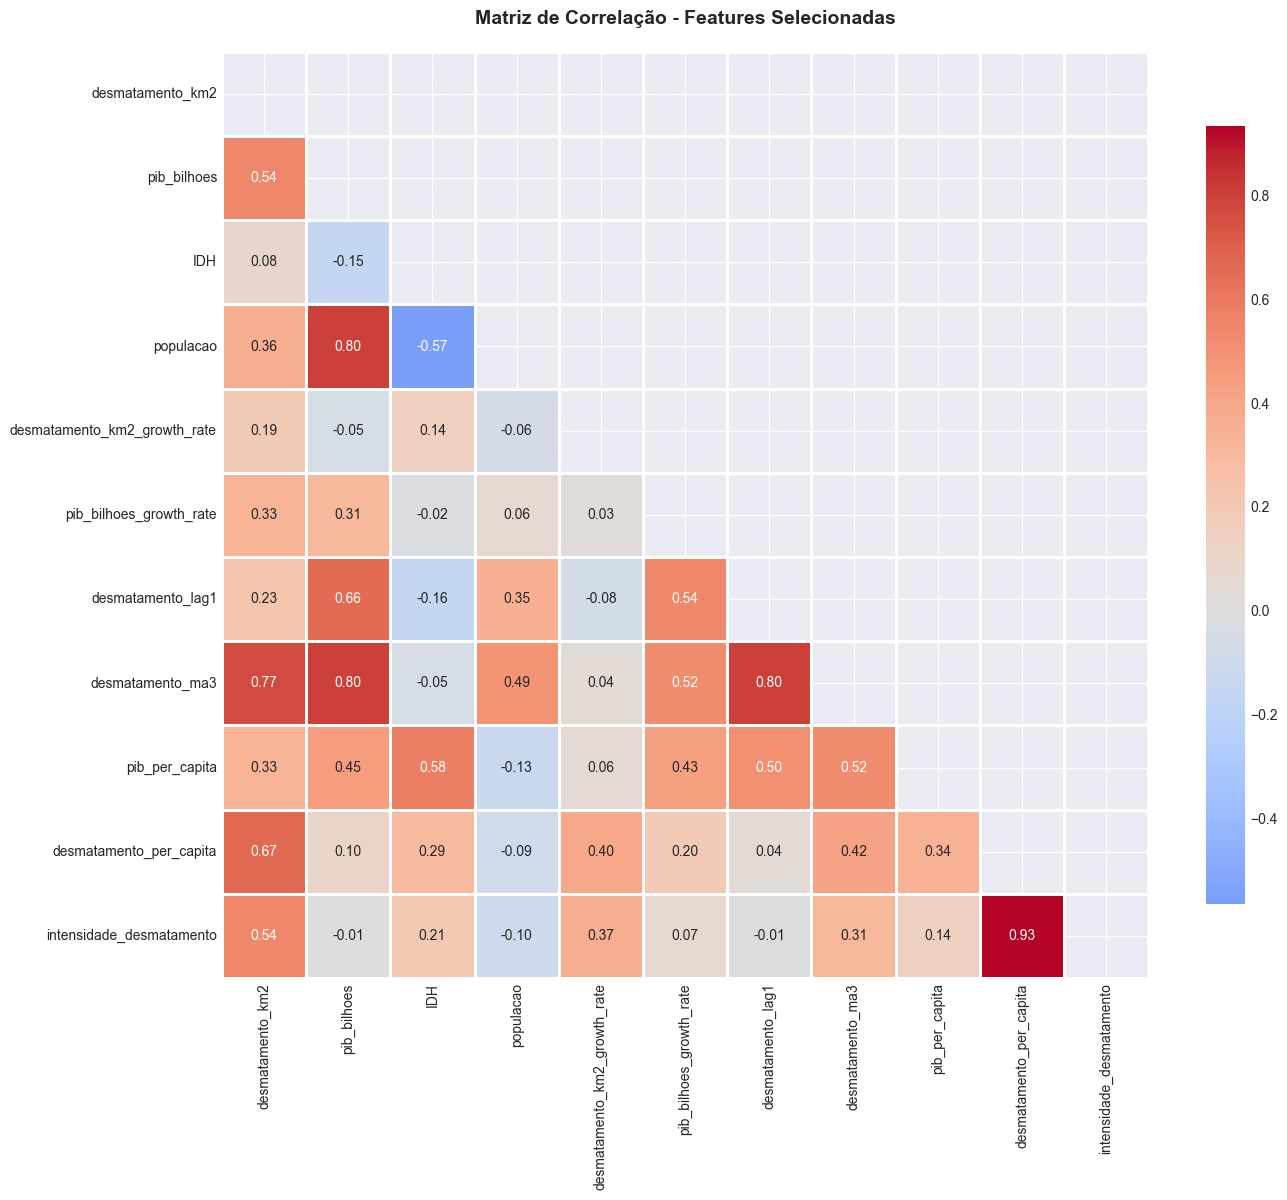

In [15]:
# Seleciona features numéricas relevantes
features_numericas = [
    'desmatamento_km2', 'pib_bilhoes', 'IDH', 'populacao',
    'desmatamento_km2_growth_rate', 'pib_bilhoes_growth_rate',
    'desmatamento_lag1', 'desmatamento_ma3',
    'pib_per_capita', 'desmatamento_per_capita', 'intensidade_desmatamento'
]

# Matriz de correlação
fig = visualizer.plot_correlation_matrix(
    df=df,
    columns=features_numericas,
    title='Matriz de Correlação - Features Selecionadas',
    figsize=(14, 12)
)
plt.show()

In [16]:
# Top correlações com desmatamento
corr_desmat = df[features_numericas].corr()['desmatamento_km2'].sort_values(ascending=False)

print("🔍 Top 10 Features mais correlacionadas com Desmatamento:")
print("="*60)
for i, (feature, corr) in enumerate(corr_desmat.items(), 1):
    if feature != 'desmatamento_km2':
        print(f"{i:2d}. {feature:35s}: {corr:+.3f}")

🔍 Top 10 Features mais correlacionadas com Desmatamento:
 2. desmatamento_ma3                   : +0.766
 3. desmatamento_per_capita            : +0.668
 4. pib_bilhoes                        : +0.544
 5. intensidade_desmatamento           : +0.538
 6. populacao                          : +0.356
 7. pib_bilhoes_growth_rate            : +0.331
 8. pib_per_capita                     : +0.330
 9. desmatamento_lag1                  : +0.234
10. desmatamento_km2_growth_rate       : +0.186
11. IDH                                : +0.082


## 1️⃣3️⃣ Preparação Final dos Dados

In [17]:
# Preenche NaN de forma inteligente ao invés de deletar anos 2012-2013
print("🔧 Preenchendo valores faltantes (NaN) de forma inteligente...\n")

# Para cada UF, preenche NaN usando estratégias específicas por coluna
df_clean = df.copy()

# Identifica colunas com NaN
colunas_com_nan = df_clean.columns[df_clean.isna().any()].tolist()
print(f"Colunas com NaN: {colunas_com_nan}\n")

# Estratégia de preenchimento por tipo de feature:
for col in colunas_com_nan:
    if 'lag' in col.lower():
        # Lags: backward fill por UF
        df_clean[col] = df_clean.groupby('UF')[col].fillna(method='bfill')
    
    elif 'ma' in col.lower() or 'std' in col.lower():
        # Médias/desvios móveis: backward fill por UF
        df_clean[col] = df_clean.groupby('UF')[col].fillna(method='bfill')
    
    elif 'growth_rate' in col.lower():
        # Growth rates: preenche com 0 (sem crescimento nos primeiros anos)
        df_clean[col] = df_clean[col].fillna(0)
    
    elif df_clean[col].dtype.name == 'category':
        # Colunas categóricas: forward fill por UF
        df_clean[col] = df_clean.groupby('UF')[col].fillna(method='ffill')
    
    else:
        # Outras features numéricas: forward fill por UF
        df_clean[col] = df_clean.groupby('UF')[col].fillna(method='ffill')

# Qualquer NaN restante em colunas NUMÉRICAS: preenche com 0
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

# NaN restantes em categóricas: forward fill geral
categorical_cols = df_clean.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    if df_clean[col].isna().any():
        df_clean[col] = df_clean[col].fillna(method='ffill').fillna(method='bfill')

print(f"✅ Shape após preenchimento: {df_clean.shape}")
print(f"📊 Registros mantidos: {df_clean.shape[0]} (era {df.shape[0]})")
print(f"🎯 Anos preservados: {df_clean['ano'].min():.0f} - {df_clean['ano'].max():.0f}")

# Verifica se há valores faltantes
missing = df_clean.isna().sum()
print(f"\n✅ Valores faltantes após preenchimento:")
print(f"   Total de NaN: {missing.sum()}")


🔧 Preenchendo valores faltantes (NaN) de forma inteligente...

Colunas com NaN: ['desmatamento_km2_growth_rate', 'pib_bilhoes_growth_rate', 'populacao_growth_rate', 'IDH_growth_rate', 'desmatamento_lag1', 'desmatamento_lag2', 'pib_lag1', 'idh_lag1', 'desmatamento_std3']

✅ Shape após preenchimento: (90, 38)
📊 Registros mantidos: 90 (era 90)
🎯 Anos preservados: 2012 - 2021

✅ Valores faltantes após preenchimento:
   Total de NaN: 0


## 1️⃣4️⃣ Salvar Dados Processados

In [18]:
# Salva dataset com features engenhadas
processor.save_processed_data(df_clean, 'base_final_engineered.csv')

print("\n✅ Dados processados salvos com sucesso!")
print(f"   Arquivo: ../data/processed/base_final_engineered.csv")
print(f"   Shape: {df_clean.shape}")
print(f"   Features: {df_clean.shape[1]} colunas")

✅ Dados salvos em: ..\data\processed\base_final_engineered.csv

✅ Dados processados salvos com sucesso!
   Arquivo: ../data/processed/base_final_engineered.csv
   Shape: (90, 38)
   Features: 38 colunas


## 🎯 Próximos Passos

1. **Modelagem**: Treinar modelos de Machine Learning com scikit-learn
2. **Validação**: Avaliar performance dos modelos
3. **Predições**: Fazer previsões de desmatamento futuro
4. **Dashboard**: Visualizar resultados de forma interativa